In [1]:
# Importing the Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn import metrics

### Importing the Boston House Price Dataset

In [2]:
house_price_dataset = fetch_openml(name='boston', version=2)

C:\Users\daksh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
print(house_price_dataset)

{'data':         CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...  ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8

In [4]:
# Loading the Dataset to a Pandas DataFrame
house_price_dataframe = pd.DataFrame(house_price_dataset.data)

In [5]:
# Add the target (price) column to the DataFrame
house_price_dataframe['price'] = house_price_dataset.target

In [6]:
# Printing the first 5 rows of the DataFrame
house_price_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,N
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,P
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,N
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,N
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,N


In [7]:
# Checking the number of rows and columns
house_price_dataframe.shape

(506, 14)

In [8]:
# Checking for the missing Values of the DataFrame
house_price_dataframe.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [9]:
# getting some Statistical measures of the DataFrame
house_price_dataframe.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


### Understanding the correlation between the various features and the datasets
#### 1. Positive correlation
#### 2. Negative correlation 

In [10]:
# non_numeric_columns = house_price_dataframe.select_dtypes(exclude=['float64', 'int64']).columns
# print(non_numeric_columns)

In [11]:
house_price_dataframe = house_price_dataframe.apply(pd.to_numeric, errors='coerce')
correlation = house_price_dataframe.corr()

<Axes: >

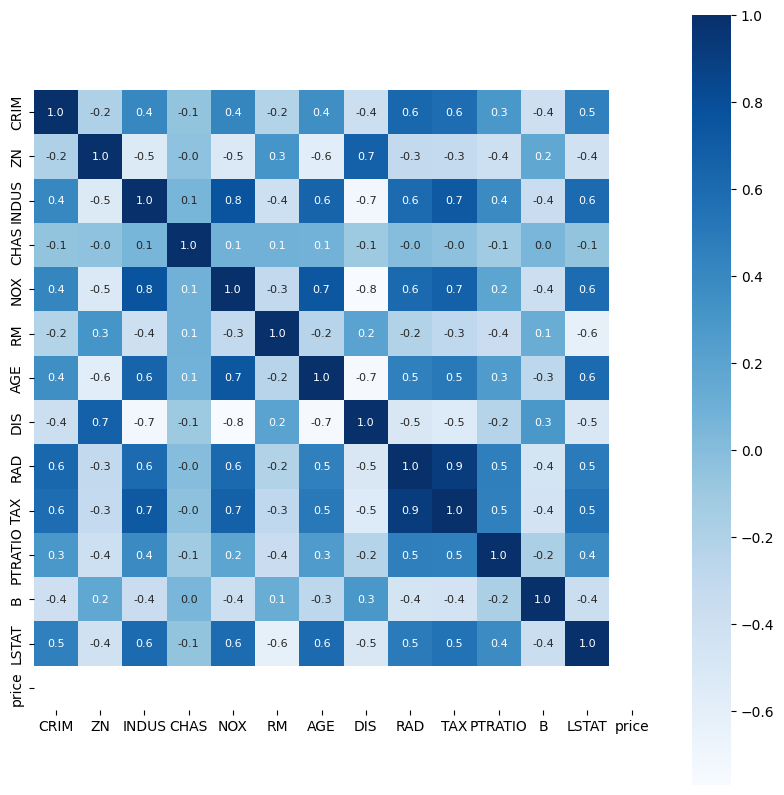

In [12]:
# Constructing a Heat Map to Understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

## Splitting the Data and Target

In [13]:
x = house_price_dataframe.drop(['price'], axis = 1)
y = house_price_dataframe['price']

In [14]:
print(x)
print(y)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

## Splitting the Data into Training and Testing Data

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [16]:
print(x.shape, x_train.shape, x_test.shape)

(506, 13) (404, 13) (102, 13)


## Model Training

### XGBoost Regressor

In [17]:
x_train = np.nan_to_num(x_train, nan=np.nanmean(x_train))

if len(y_train) > 0 and not np.isnan(np.sum(y_train)):
    y_train = np.nan_to_num(y_train, nan=np.nanmean(y_train))
else:
    y_train = np.zeros_like(y_train)
    

C:\Users\daksh\AppData\Local\Temp\ipykernel_15888\4127198868.py:4: RuntimeWarning: Mean of empty slice
  y_train = np.nan_to_num(y_train, nan=np.nanmean(y_train))


In [18]:
# Create the XGBRegressor model
model = XGBRegressor()

In [19]:
# Fit the XGBRegressor model
model.fit(x_train, y_train)

XGBoostError: [01:23:53] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\data\data.cc:507: Check failed: valid: Label contains NaN, infinity or a value too large.